<a href="https://colab.research.google.com/github/teocala/Mini-Projects-DeepL/blob/main/Colab_Notebook_Thomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()

Mounted at /content/drive


In [2]:
my_path = '/content/drive/MyDrive/DeepL/Miniproject_1/'

In [3]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [77]:
def psnr(denoised, ground_truth):
    # Peak Signal to Noise Ratio : denoised and ground˙truth have range [0 , 1]
    mse = torch . mean ((denoised - ground_truth ) ** 2)
    return -10 * torch . log10 ( mse / (255**2) + 10** -8)

In [111]:
### For mini-project 1
class Model(nn.Module):
    def __init__(self) -> None:
        ## instantiate model + optimizer + loss function + any other stuff you need
        super().__init__()

        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 28, 28
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 64, 14, 14
        #     nn.Conv2d(64, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 14, 14
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 5, stride = 1), # N, 128, 10, 10
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 5, 5
        # )

        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(128, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 5, 5
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 64, 10, 10
        #     nn.ConvTranspose2d(64, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 10, 10
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 3, kernel_size = 5, stride = 1), # N, 64, 14, 14
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 3, 28, 28
        #     nn.ConvTranspose2d(3, 3, kernel_size = 5, stride = 1), # N, 3, 32, 32
        #     nn.ReLU()
        # )

        # Network with less MaxPool and Upsample, PSNR = 20.3, less "square artifacts" in the prediction
        # still too smooth 
        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size = 5, stride = 1), # N, 64, 20, 20
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 5, stride = 1), # N, 128, 16, 16
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 8, 8
        # )

        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(128, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 8, 8
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 64, 16, 16
        #     nn.ConvTranspose2d(64, 64, kernel_size = 5, stride = 1), # N, 64, 20, 20
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 32, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(32, 3, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(3, 3, kernel_size = 5, stride = 1), # N, 3, 32, 32
        #     nn.ReLU()
        # )

        # Network with smaller kernel sizes , PSNR = 21.3
        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size = 3, stride = 1), # N, 64, 22, 22
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 3, stride = 1), # N, 128, 20, 20
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 10, 10
        # )

        # self.decoder = nn.Sequential(
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 128, 20, 20
        #     nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1), # N, 64, 22, 22
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 64, kernel_size = 3, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1), # N, 32, 26, 26
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(32, 3, kernel_size = 3, stride = 1), # N, 3, 28, 28
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(3, 3, kernel_size = 5, stride = 1), # N, 3, 32, 32
        #     nn.ReLU()
        # )

        # Network with smaller kernel sizes and upsample at the end , PSNR = 22
        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size = 3, stride = 1), # N, 64, 22, 22
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 3, stride = 1), # N, 128, 20, 20
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 10, 10
        # )

        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1), # N, 64, 12, 12
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 64, kernel_size = 3, stride = 1, padding = 1), # N, 64, 12, 12
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1), # N, 32, 14, 14
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(32, 3, kernel_size = 3, stride = 1), # N, 3, 16, 16
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 3, 32, 32
        # )

        # Network with upsample before the end, so that we don't smooth so much the final result, PSNR = 22.1
        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 5, stride = 1), # N, 32, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size = 3, stride = 1), # N, 64, 22, 22
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 3, stride = 1), # N, 128, 20, 20
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 10, 10
        # )

        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1), # N, 64, 12, 12
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 64, kernel_size = 3, stride = 1, padding = 1), # N, 64, 12, 12
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1), # N, 32, 14, 14
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 3, 28, 28
        #     nn.ConvTranspose2d(32, 3, kernel_size = 5, stride = 1), # N, 3, 32, 32
        #     nn.ReLU()
        # )

        # Network with internal kernel sizes bigger than the external ones, PSNR = 23 with 40 epochs
        # self.encoder = nn.Sequential( # initial: N, 3, 32, 32
        #     nn.Conv2d(3, 32, kernel_size = 3, stride = 1), # N, 32, 30, 30
        #     nn.ReLU(),
        #     nn.Conv2d(32, 64, kernel_size = 3, stride = 1), # N, 64, 28, 28
        #     nn.ReLU(),
        #     nn.Conv2d(64, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
        #     nn.ReLU(),
        #     nn.Conv2d(64, 128, kernel_size = 5, stride = 1), # N, 128, 20, 20
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 10, 10
        # )

        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(128, 64, kernel_size = 5, stride = 1), # N, 64, 14, 14
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(64, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 14, 14
        #     nn.ReLU(),
        #     nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 64, 28, 28
        #     nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1), # N, 32, 30, 30
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(32, 3, kernel_size = 3, stride = 1), # N, 3, 32, 32
        #     nn.ReLU()
        # )

        self.encoder = nn.Sequential( # initial: N, 3, 32, 32
            nn.Conv2d(3, 32, kernel_size = 3, stride = 1), # N, 32, 30, 30
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1), # N, 64, 28, 28
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size = 5, stride = 1), # N, 64, 24, 24
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size = 5, stride = 1), # N, 128, 20, 20
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0), # N, 128, 10, 10
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size = 5, stride = 1), # N, 64, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(64, 64, kernel_size = 5, stride = 1, padding = 2), # N, 64, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 1), # N, 32, 15, 15
            nn.ReLU(),
            nn.Upsample(scale_factor=2,mode = 'bilinear', align_corners=True), # N, 64, 30, 30
            nn.ConvTranspose2d(32, 3, kernel_size = 3, stride = 1), # N, 3, 32, 32
            nn.ReLU()
        )
        

        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr = 0.001)
        

    def load_pretrained_model(self ) -> None:
        ## This loads the parameters saved in bestmodel . pth into the model
        pass

    def train(self, train_input, train_target, num_epochs) -> None:
        # : train˙input : tensor of size (N , C , H , W ) containing a noisy version of the images.
        # : train˙target : tensor of size (N , C , H , W ) containing another noisy version of the
        # same images , which only differs from the input by their noise.

        batch_size = 100
        epochs_to_print = torch.arange(0,num_epochs,int(num_epochs/10))
        total_loss = 0

        # train_input /= 255
        # train_target /= 255

        for epoch in range(num_epochs):
            total_loss = 0
            for batch_input, batch_target in zip(train_input.split(batch_size), train_target.split(batch_size)):
                output = self.predict(batch_input)
                loss = self.criterion(output, batch_target)
                total_loss += loss
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
            
            if (epoch in epochs_to_print):
              print(f'Epoch {epoch}/{num_epochs-1} Training Loss {total_loss}')
    
    def predict(self, test_input) -> torch.Tensor:
        # : test˙input : tensor of size ( N1 , C , H , W ) that has to be denoised by the trained
        # or the loaded network .
        # : returns a tensor of the size ( N1 , C , H , W )
        
        # like the forward method

        # test_input /= 255
        
        y = self.encoder(test_input)
        # y = torch.clamp(self.decoder(y), min=0, max=255)
        y = self.decoder(y)

        
        return y


In [112]:
def main(training=True,images_to_visualize='train', num_epochs=500):

    device = torch.device('cuda')

    # Load the data    
    print('Loading the data...')
    train_input, train_target = torch.load(my_path + 'train_data.pkl')
    test_input, test_target = torch.load(my_path + 'val_data.pkl')
    train_input, train_target = train_input.to(device), train_target.to(device)
    test_input, test_target = test_input.to(device), test_target.to(device)


    # Select a subset to speed up computations
    train_size = 50000
    train_input = train_input[:train_size]
    train_target = train_target[:train_size]
    test_input = test_input[:train_size]
    test_target = test_target[:train_size]


    # Convert the data into float type
    train_input = train_input.float()
    train_target = train_target.float()
    test_input = test_input.float()
    test_target = test_target.float()

    
    print(f'Training data of size {train_input.shape}')

    # Defining and training the model
    model = Model()
    model = model.to(device)
    path_to_model = "/content/drive/MyDrive/DeepL/Miniproject_1/bestmodel.pth"

    if (training == True):
      print('Training the model...')
      model.train(train_input, train_target, num_epochs=num_epochs)
    else:
      checkpoint = torch.load(path_to_model)
      model.load_state_dict(checkpoint)

    # Save the model
    torch.save(model.state_dict(),path_to_model)

    # Testing
    print('Using the trained model to denoise validation images...')
    with torch.no_grad():
        prediction = model.predict(test_input)

    # Evaluating error
    error = psnr(prediction, test_target)
    print(f'The PSNR on the validation set is {error} DB')


    # Visual comparison between original images and reconstructions
    # Just for us, probably we can't use matplotlib
    # Try to see if there are visualization tools only in Pytorch 
    # Set "train" if you want to compare the training images, "test" for testing ones
    if (images_to_visualize != 'no'):
      if (images_to_visualize == "train"):
          with torch.no_grad():
              pred = model.predict(train_input).cpu()
          train_input = train_input.cpu()
          images = train_input
          ref = train_target.cpu()
      elif (images_to_visualize == "test"):
          pred = prediction
          test_input = test_input.cpu()
          images = test_input
          pred = pred.cpu()
          ref = test_target.cpu()
      else:
          raise RuntimeError("Che cazzo hai messo coglione")
      n_comparisons = 10

      for i in range(n_comparisons):
          f = plt.figure()
          f.add_subplot(1, 3, 1)
          fig1 = plt.imshow(images[i].int().permute(1, 2, 0))
          fig1.axes.get_xaxis().set_visible(False)
          fig1.axes.get_yaxis().set_visible(False)
          f.add_subplot(1, 3, 2)
          fig2 = plt.imshow(pred[i].int().permute(1, 2, 0))
          fig2.axes.get_xaxis().set_visible(False)
          fig2.axes.get_yaxis().set_visible(False)
          f.add_subplot(1, 3, 3)
          fig3 = plt.imshow(ref[i].int().permute(1, 2, 0))
          fig3.axes.get_xaxis().set_visible(False)
          fig3.axes.get_yaxis().set_visible(False)
          plt.show(block=True)

Loading the data...
Training data of size torch.Size([50000, 3, 32, 32])
Training the model...
Epoch 0/39 Training Loss 1488569.375
Epoch 4/39 Training Loss 591214.9375
Epoch 8/39 Training Loss 560169.1875
Epoch 12/39 Training Loss 546391.25
Epoch 16/39 Training Loss 536392.0
Epoch 20/39 Training Loss 530734.875
Epoch 24/39 Training Loss 525343.0
Epoch 28/39 Training Loss 520625.21875
Epoch 32/39 Training Loss 517447.875
Epoch 36/39 Training Loss 515520.6875
Using the trained model to denoise validation images...
The PSNR on the validation set is 23.11260986328125 DB


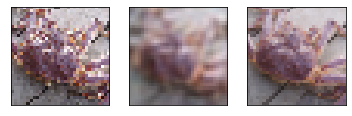

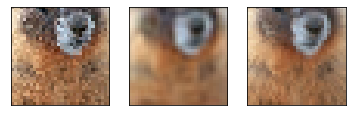

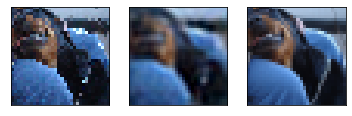

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


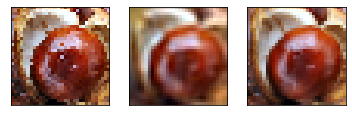

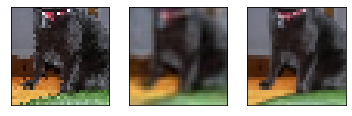

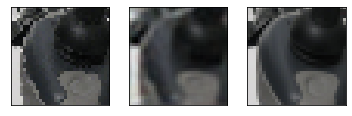

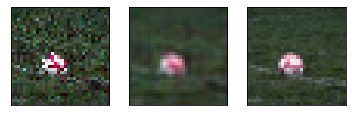

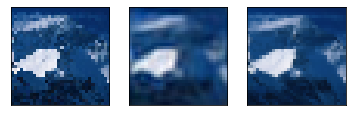

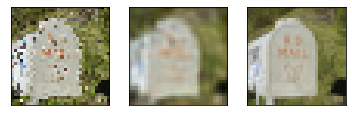

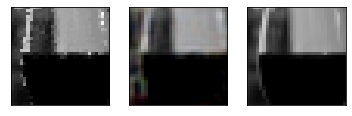

In [113]:
main(training=True,images_to_visualize='test', num_epochs=40) # images_to_visualize='train','test','no'

Loading the data...
Training data of size torch.Size([50000, 3, 32, 32])
Training the model...
Epoch 0/19 Training Loss 0
Epoch 4/19 Training Loss 916361.5
Epoch 8/19 Training Loss 850599.9375
Epoch 12/19 Training Loss 823643.25
Epoch 16/19 Training Loss 808819.4375
Using the trained model to denoise validation images...
The PSNR on the validation set is 18.633787155151367 DB


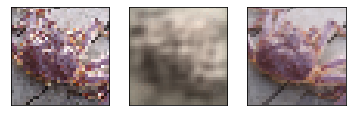

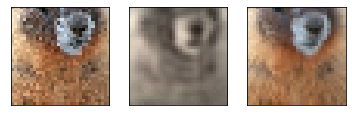

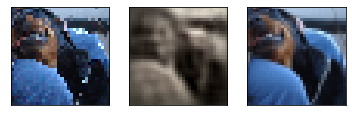

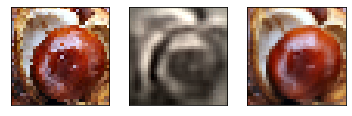

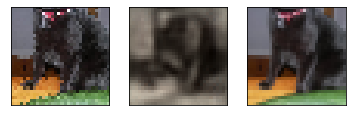

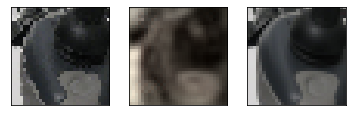

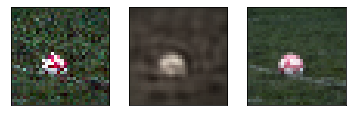

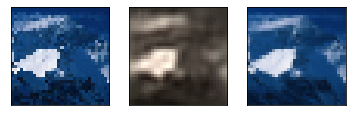

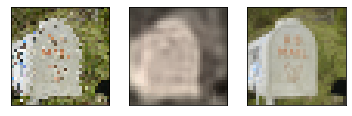

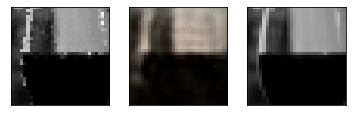

In [90]:
# main(training=True,images_to_visualize='test', num_epochs=20) # images_to_visualize='train','test','no'